# Diskrete Kosinustransformation
Idee: Ein akustisches Signal wird diskretisiert; dieses diskrete Signal wird als Vektor dargestellt mit $n$ Sample-Punkten.

Die Menge aller Signale entspricht jetzt dem Raum $\mathbb{R}^n$.

Dieser Raum besitzt die natürliche Basis aus den Vektoren $(1,0,0,\dots,0)$, $(0,1,0,\dots,0)$ usw.

Neben dieser Basis wird eine weitere Basis betrachtet mit der diskretisierten cos-Funktion. Der nullte Basisvektor besteht aus einer konstanten Funktion, der erste Basisvektor ist die Diskretisierung von $\cos(x)$ für $x$ in $[0,\pi]$, der zweite Basisvektor ist Diskretisierung von $\cos(2x)$.

Für die Stützpunkte der Diskretisierung teilt man das Intervall $[0,\pi]$ in $n$ gleich große Teile wählt aus jedem dieser Teile den Mittelpunkt. Die Stützpunkte für die Diskretisierung sind also die Stellen 

$x_0 = \frac1{2n}\cdot\pi$,

$x_1 = \frac3{2n}\cdot\pi$,

$x_2 = \frac5{2n}\cdot\pi$,

usw.

$x_k = \frac{2k+1}{2n}\cdot\pi$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Nun werden die oben erwähnten Basisvektoren gebildet; mit einem Normierungsfaktor wird erreicht, dass die Längen der Basisvektoren eins sind:

In [2]:
def stuetzstellen(n) :
    return np.pi * np.arange(1/(2*n), 1 , 1 / n)

In [3]:
def normierungsfaktor(n, k) :
    if k == 0 : return np.sqrt(1/n)
    else : return np.sqrt(2/n)

In [4]:
def show_diskrete_cos_basis(n) :
    '''
    Stellt die Basisvektoren für die Diskrete Kosinustransformation für R^n graphisch dar
    '''
    x_disk = stuetzstellen(n)
    x_cont = np.linspace(0, np.pi, 300)
    for k in range(n) :
        plt.ylim((-1.1,1.1))
        plt.plot(x_cont, np.cos(k*x_cont) * normierungsfaktor(n, k), color='r')
        plt.plot(x_disk, np.cos(k*x_disk) * normierungsfaktor(n, k), 'go')
        plt.title("k="+str(k))
        plt.show()

Für $n=10$ werden die Basisvektoren visualisiert:

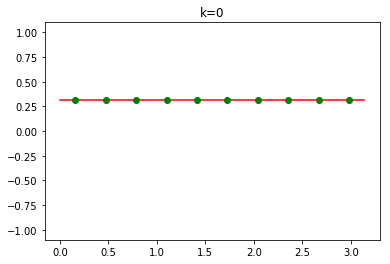

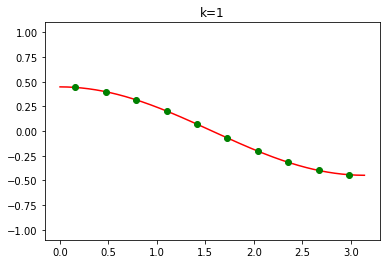

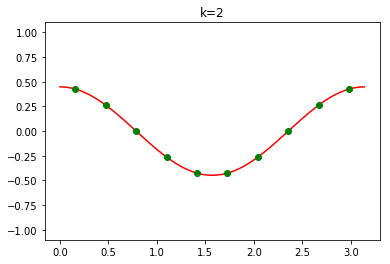

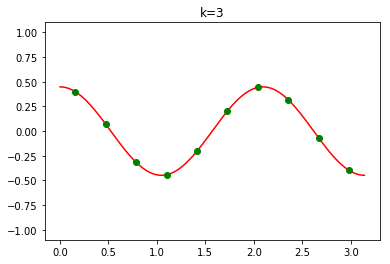

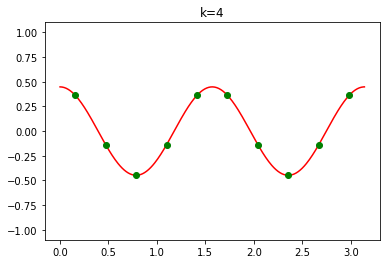

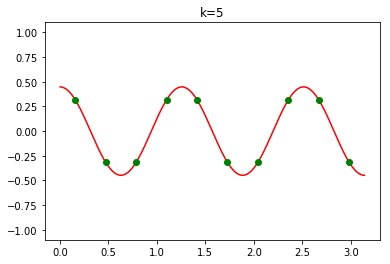

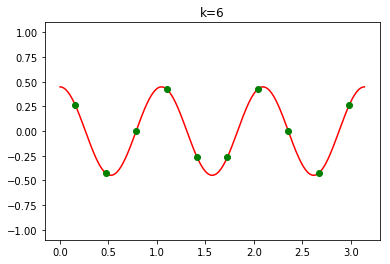

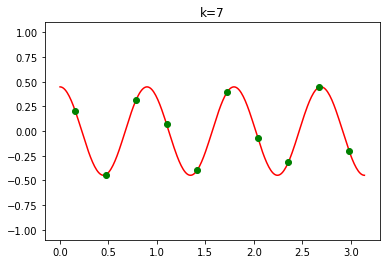

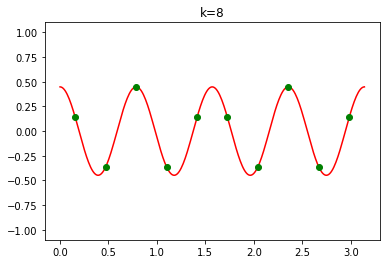

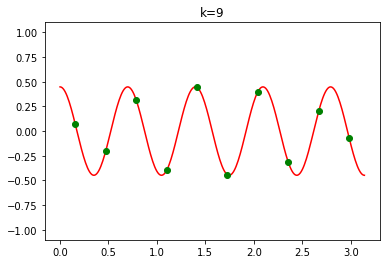

In [5]:
show_diskrete_cos_basis(10)

Bis etwas $k=n/2$ ist die Diskretisierung des $\cos$ noch zu erkennen, nachher wird's schwieriger.

Im folgenden wir die Matrix für die Diskrete Kosinustransformation aufgestellt; 
die Spalten dieser Matrix sind die die Vektoren cos_vec(n,k).

In [6]:
def DCT(n) :
    x = stuetzstellen(n)
    vektoren = [np.cos(k*x) * normierungsfaktor(n,k) for k in range(n) ]
    return np.array(vektoren).T

Test:

In [7]:
DCT(3)

array([[ 5.77350269e-01,  7.07106781e-01,  4.08248290e-01],
       [ 5.77350269e-01,  4.99959962e-17, -8.16496581e-01],
       [ 5.77350269e-01, -7.07106781e-01,  4.08248290e-01]])

In [8]:
np.round(DCT(3).T @ DCT(3), 8)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

An diesem Beispiel zeigt es sich, dass DCT(3) eine orthogonale Matrix ist, 
dass also die Inverse von DCT(3) gerade die Transponierte von DCT(3) ist.

Das gilt allgemein für jedes DCT(n), es ist aber etwas trickig, das nachzurechnen.
Wir werden diese Berechnung im dritten Block nachholen.

## Kompression mit der diskreten Kosinustransformation.
Ein Signal wird diskretisiert und somit als Vektor aufgefasst; 
jetzt wird das Signal dargestellt als Linearkombination aus den neuen Basisvektoren.
Wenn das Signal ein "schöner" Ton ist, da gibt es darin keine Kratzgeräusche und das bedeutet in der Regel, dass die hohen Frequenzen fehlen.

Beispiel:

In [9]:
X = np.arange(100)
sig = np.sin(X / 2) + np.sin(X/3) # Überlagerung von zwei Sinusschwingungen

In [67]:
sig

array([ 0.        ,  0.80662024,  1.45984079,  1.83896597,  1.88123533,
        1.5938801 ,  1.05041743,  0.37230265, -0.29952987, -0.83641011,
       -1.14949224, -1.20681737, -1.03621799, -0.71389451, -0.34196832,
       -0.0209243 ,  0.17602886,  0.22028887,  0.13270299, -0.02502411,
       -0.16986988, -0.22270916, -0.13249334,  0.10705561,  0.45278533,
        0.82097221,  1.10771825,  1.21590291,  1.08192459,  0.69535828,
        0.10626673, -0.5821488 , -1.23429907, -1.71177555, -1.90489712,
       -1.75876885, -1.28756016, -0.57341438,  0.2500052 ,  1.02570691,
        1.60689679,  1.8881714 ,  1.82726299,  1.45246   ,  0.85420856,
        0.16311333, -0.48029225, -0.95679716, -1.19348168, -1.17675487,
       -0.950799  , -0.60233914, -0.23595277,  0.0536549 ,  0.20538868,
        0.20564154,  0.08903439, -0.07387843, -0.19850747, -0.21185974,
       -0.07508637,  0.203089  ,  0.56578002,  0.92063009,  1.16281613,
        1.2026882 ,  0.99106055,  0.53559401, -0.09621902, -0.78

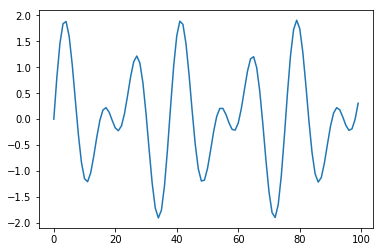

In [10]:
plt.plot(sig)

Jetzt wird der Basiswechsel vorgenommen:

In [70]:
tr = DCT(100).T @ sig
tr

array([ 3.71137684e-01,  8.74771103e-01,  5.43527887e-01,  9.18562736e-01,
        6.08649070e-01,  1.02436755e+00,  7.61888053e-01,  1.25834619e+00,
        1.18556880e+00,  1.99259550e+00,  4.47280491e+00, -3.57528683e+00,
       -1.70368772e+00,  8.86689530e-01, -5.40863134e-01,  4.31933714e+00,
       -3.01144422e+00, -3.90215547e+00, -3.60737579e-01, -1.37128120e+00,
       -2.39217439e-01, -8.12006329e-01, -1.77829780e-01, -5.63088615e-01,
       -1.39310594e-01, -4.22254707e-01, -1.12780840e-01, -3.31998022e-01,
       -9.34573310e-02, -2.69524550e-01, -7.88251618e-02, -2.23944770e-01,
       -6.74174102e-02, -1.89386398e-01, -5.83165273e-02, -1.62400496e-01,
       -5.09184150e-02, -1.40828422e-01, -4.48092289e-02, -1.23250858e-01,
       -3.96962502e-02, -1.08697114e-01, -3.53668875e-02, -9.64815751e-02,
       -3.16632558e-02, -8.61067753e-02, -2.84658291e-02, -7.72034308e-02,
       -2.56825973e-02, -6.94919722e-02, -2.32416826e-02, -6.27570959e-02,
       -2.10861948e-02, -

Man sieht, dass die höheren Frequenzen kleine Koeffizienten besitzen; 
die Kompression besteht nun darin, dass man die Amplituden dieser hohen Frequenzen auf null setzt.
Man kann nun eine Kodierung eines Signals definieren: die Kodierung berechnet zuerst die DCT, und verwendet aber nur die ersten  k Koefiizienten:

In [57]:
def encode(signal, k = None) :
    if k is None : k = len(signal)
    return (DCT(len(signal)).T[0:k,:] @ signal) # ist gleich (DFT(n) @ signal)[0:k] 

In [71]:
enc_sig = encode(sig, 20)
enc_sig

array([ 0.37113768,  0.8747711 ,  0.54352789,  0.91856274,  0.60864907,
        1.02436755,  0.76188805,  1.25834619,  1.1855688 ,  1.9925955 ,
        4.47280491, -3.57528683, -1.70368772,  0.88668953, -0.54086313,
        4.31933714, -3.01144422, -3.90215547, -0.36073758, -1.3712812 ])

In [63]:
def decode(enc_signal, n = None) :
    if n is None : n = len(enc_signal)
    return DCT(n)[:,0:len(enc_signal)] @ enc_signal

In [75]:
dec_sign = decode(enc_sig, 100)
dec_sign

array([ 0.68017832,  0.85392896,  1.13425473,  1.40819621,  1.55314921,
        1.4765275 ,  1.14662788,  0.605095  , -0.04293686, -0.65807603,
       -1.10639754, -1.297605  , -1.21012322, -0.89567779, -0.46221496,
       -0.04059228,  0.25468727,  0.35876935,  0.27382728,  0.06554491,
       -0.1598944 , -0.29106059, -0.2479492 , -0.00897876,  0.37975289,
        0.81567422,  1.16810284,  1.31553822,  1.1812278 ,  0.7570227 ,
        0.10899912, -0.63653123, -1.32267951, -1.79935248, -1.95869208,
       -1.75986448, -1.23759657, -0.49317136,  0.32910747,  1.07377091,
        1.60672247,  1.84131404,  1.75287635,  1.37957185,  0.81050145,
        0.1645036 , -0.43539005, -0.88647581, -1.12513556, -1.13649938,
       -0.95356541, -0.6463728 , -0.30372818, -0.01146502,  0.16799638,
        0.21013471,  0.13331659, -0.00724369, -0.13550849, -0.17698756,
       -0.08187588,  0.15730109,  0.49885751,  0.85875776,  1.1303535 ,
        1.21264789,  1.03990191,  0.60440475, -0.03451683, -0.75

Das reduzierte Signal wird nun zurücktransformiert:

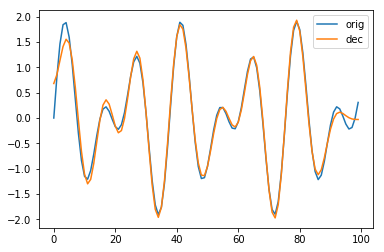

In [76]:
plt.plot(sig, label='orig')
plt.plot(dec_sign, label='dec')
plt.legend()

Man kann die diskrete Kosinustransformation auch verwenden, um aus einem Tonsignal das Rauschen rauszufiltern: Rauschen besteht aus über alle Frequenzen verteilte Anteile mit kleinen Amplituden. Für die Rauschunterdrückung filtert man im transformierten Signal alle Amplituden raus, deren Absolutbetrag kleiner als ein geeigneter Schwellwert ist. 

In [78]:
# Beispiel eines verrauschten Signals
rauschen = 0.4 * np.random.randn(100)
sig_verrauscht = sig + rauschen
sig_verrauscht_gefiltert = decode(encode(sig_verrauscht, 30), 100)

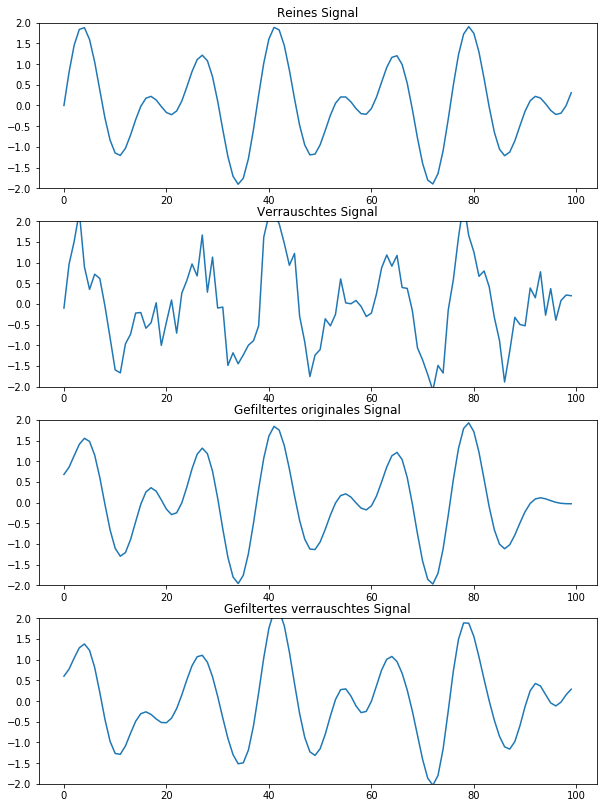

In [79]:
plt.subplot(4,1,1)
plt.plot(sig)
plt.ylim((-2,2))
plt.title('Reines Signal')

plt.subplot(4,1,2)
plt.plot(sig_verrauscht)
plt.ylim((-2,2))
plt.title('Verrauschtes Signal')

plt.subplot(4,1,3)
plt.plot(dec_sig)
plt.ylim((-2,2))
plt.title('Gefiltertes originales Signal')


plt.subplot(4,1,4)
plt.plot(sig_verrauscht_gefiltert)
plt.ylim((-2,2))
plt.title('Gefiltertes verrauschtes Signal')

plt.gcf().set_size_inches(10, 14)

## Anwendung
Das Jpeg Format beruht auf einer zweidimensionalen Variante der diskreten Kosinustransformation. Bilder werden in Qudrate der Größe 8*8 Pixel aufgeteil und jedes Quadrätchen wird einzen transformiert mit der diskreten Kosinustransformation. Eine gute Kompression mit kleinen Verlusten ist möglich, wenn es keine scharfen Kanten gibt. Wenn es jedoch scharfe Kanten gibt (z.B. bei gescannten Textdokumemnten), dann kann man entweder nicht groß komprimieren oder sonst werden die Kanten "verschmiert".